In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
headers = ['price', 'ticket type', 'age', 'discount', 'date', 'departure', 'destination', 'duration', 'start time', 'arrival time', 'changes']
df = pd.read_csv('data/berlin-biberach/data_E_0/01_12_2022_E_0.csv', skiprows=[0], header=None, names=headers)
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes
0,"33,90",Super Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
1,"39,90",Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
2,"145,00",Flexpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
3,"166,90",Flexpreis Plus,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
4,"33,90",Super Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         751 non-null    object
 1   ticket type   751 non-null    object
 2   age           751 non-null    object
 3   discount      751 non-null    int64 
 4   date          751 non-null    object
 5   departure     751 non-null    object
 6   destination   751 non-null    object
 7   duration      751 non-null    object
 8   start time    751 non-null    object
 9   arrival time  751 non-null    object
 10  changes       751 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 64.7+ KB


In [50]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 750
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         157 non-null    object
 1   ticket type   157 non-null    object
 2   age           157 non-null    object
 3   discount      157 non-null    int64 
 4   date          157 non-null    object
 5   departure     157 non-null    object
 6   destination   157 non-null    object
 7   duration      157 non-null    object
 8   start time    157 non-null    object
 9   arrival time  157 non-null    object
 10  changes       157 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 14.7+ KB


In [51]:
# parse types
df.dtypes
# repeat for each day
# concat tables of days
# save big df https://stackoverflow.com/questions/17098654/how-to-reversibly-store-and-load-a-pandas-dataframe-to-from-disk

price           object
ticket type     object
age             object
discount         int64
date            object
departure       object
destination     object
duration        object
start time      object
arrival time    object
changes          int64
dtype: object

In [52]:
df['price'] = df['price'].str.replace(',','.')

In [53]:
df['price'] = df['price'].astype(float)

In [54]:
df.dtypes

price           float64
ticket type      object
age              object
discount          int64
date             object
departure        object
destination      object
duration         object
start time       object
arrival time     object
changes           int64
dtype: object

In [55]:
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes
0,33.9,Super Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
1,39.9,Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
2,145.0,Flexpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
3,166.9,Flexpreis Plus,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
4,33.9,Super Sparpreis,E,0,"Do.,01.12.2022",Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2


In [56]:
df['date'] = df['date'].str.slice(start=4)
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes
0,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
1,39.9,Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
2,145.0,Flexpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
3,166.9,Flexpreis Plus,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
4,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2


In [57]:
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes
0,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
1,39.9,Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
2,145.0,Flexpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
3,166.9,Flexpreis Plus,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1
4,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2


In [58]:
df['datetime dep'] = df['start time'] +'-'+ df['date']
df['datetime arr'] = df['arrival time'] +'-'+ df['date']
df['datetime dep'] = pd.to_datetime(df['datetime dep'], format="%H:%M-%d.%m.%Y")
df['datetime arr'] = pd.to_datetime(df['datetime arr'], format="%H:%M-%d.%m.%Y")
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,datetime dep,datetime arr
0,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00
1,39.9,Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00
2,145.0,Flexpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00
3,166.9,Flexpreis Plus,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00
4,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2,2022-12-01 05:00:00,2022-12-01 11:36:00


In [59]:
df['sub [min]'] = (df['datetime arr'] - df['datetime dep']).astype('timedelta64[m]')
df.head()

,price,ticket type,age,discount,date,departure,destination,duration,start time,arrival time,changes,datetime dep,datetime arr,sub [min]
0,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
1,39.9,Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
2,145.0,Flexpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
3,166.9,Flexpreis Plus,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,7h 50min,04:50,12:40,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
4,33.9,Super Sparpreis,E,0,01.12.2022,Berlin+Hbf,Biberach%28Ri%C3%9F%29,6h 36min,05:00,11:36,2,2022-12-01 05:00:00,2022-12-01 11:36:00,396.0


In [60]:
df = df.drop('date', axis=1)
df = df.drop('duration', axis=1)
df = df.drop('start time', axis=1)
df = df.drop('arrival time', axis=1)
df.head()

,price,ticket type,age,discount,departure,destination,changes,datetime dep,datetime arr,sub [min]
0,33.9,Super Sparpreis,E,0,Berlin+Hbf,Biberach%28Ri%C3%9F%29,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
1,39.9,Sparpreis,E,0,Berlin+Hbf,Biberach%28Ri%C3%9F%29,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
2,145.0,Flexpreis,E,0,Berlin+Hbf,Biberach%28Ri%C3%9F%29,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
3,166.9,Flexpreis Plus,E,0,Berlin+Hbf,Biberach%28Ri%C3%9F%29,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
4,33.9,Super Sparpreis,E,0,Berlin+Hbf,Biberach%28Ri%C3%9F%29,2,2022-12-01 05:00:00,2022-12-01 11:36:00,396.0


In [61]:
df['departure'] = df['departure'].apply(lambda x: 'Berlin' if x == 'Berlin+Hbf' else x)
df['destination'] = df['destination'].apply(lambda x: 'Biberach' if x == 'Biberach%28Ri%C3%9F%29' else x)
df.head()

,price,ticket type,age,discount,departure,destination,changes,datetime dep,datetime arr,sub [min]
0,33.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
1,39.9,Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
2,145.0,Flexpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
3,166.9,Flexpreis Plus,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0
4,33.9,Super Sparpreis,E,0,Berlin,Biberach,2,2022-12-01 05:00:00,2022-12-01 11:36:00,396.0


In [62]:
import seaborn as sb
df['time'] = pd.to_datetime(df['datetime dep']).dt.strftime('%H:%M')
df.head()

,price,ticket type,age,discount,departure,destination,changes,datetime dep,datetime arr,sub [min],time
0,33.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0,04:50
1,39.9,Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0,04:50
2,145.0,Flexpreis,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0,04:50
3,166.9,Flexpreis Plus,E,0,Berlin,Biberach,1,2022-12-01 04:50:00,2022-12-01 12:40:00,470.0,04:50
4,33.9,Super Sparpreis,E,0,Berlin,Biberach,2,2022-12-01 05:00:00,2022-12-01 11:36:00,396.0,05:00


/tmp/ipykernel_40286/3419037733.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 30)


AttributeError: 'AxesSubplot' object has no attribute 'show'

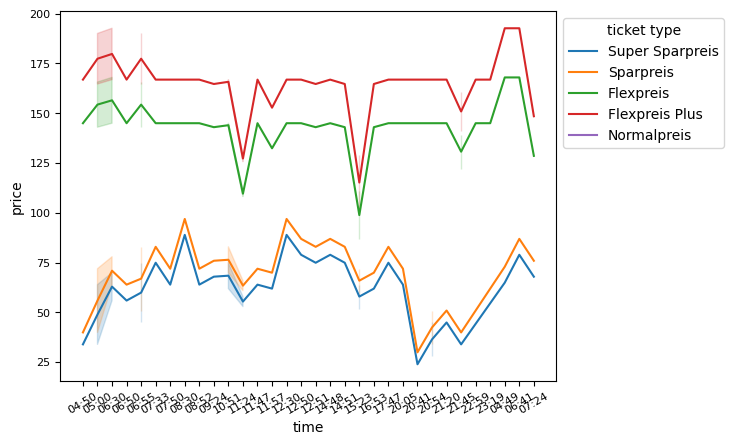

In [76]:
plt = sb.lineplot(data=df, x='time', y='price', hue='ticket type')
plt.set_xticklabels(plt.get_xticklabels(),rotation = 30)
plt.tick_params(labelsize=8)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [77]:
fig = plt.get_figure()
fig.savefig('test.png')

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
#df2 = df.sort_values(by='datetime dep', ascending=True, inplace=True)
# group by ticket type
df.set_index('datetime dep', drop=True, append=False, inplace=True, verify_integrity=False)
df = df.sort_index()
df.head()

,price,ticket type,age,discount,departure,destination,changes,datetime arr,sub [min],time
datetime dep,,,,,,,,,,
2022-12-01 04:49:00,192.7,Flexpreis Plus,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,168.0,Flexpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,64.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,72.9,Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:50:00,33.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,470.0,04:50:00


,price,ticket type,age,discount,departure,destination,changes,datetime arr,sub [min],time
datetime dep,,,,,,,,,,
2022-12-01 04:49:00,192.7,Flexpreis Plus,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,168.0,Flexpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,64.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:49:00,72.9,Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,471.0,04:49:00
2022-12-01 04:50:00,33.9,Super Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,470.0,04:50:00
2022-12-01 04:50:00,39.9,Sparpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,470.0,04:50:00
2022-12-01 04:50:00,145.0,Flexpreis,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,470.0,04:50:00
2022-12-01 04:50:00,166.9,Flexpreis Plus,E,0,Berlin,Biberach,1,2022-12-01 12:40:00,470.0,04:50:00
2022-12-01 05:00:00,71.9,Sparpreis,E,0,Berlin,Biberach,2,2022-12-01 11:36:00,396.0,05:00:00


NameError: name 'mdates' is not defined

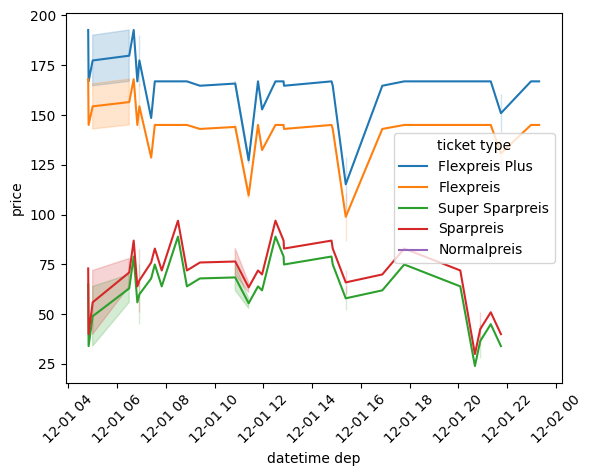

In [29]:
plt.xticks(rotation=45)
plot = sb.lineplot(data=df,x=df.index, y='price', hue='ticket type')
plot.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#x_dates = df.index.dt.strftime('%M:%H-%d.%m.%Y').sort_values().unique()
#plot.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [39]:
#df['test'] = df.index.time
import matplotlib.pyplot as plt

/tmp/ipykernel_40286/3637854842.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(plot2.get_xticklabels(),rotation = 30)


[Text(19327.166666666668, 0, '12-01 04'),
 Text(19327.25, 0, '12-01 06'),
 Text(19327.333333333332, 0, '12-01 08'),
 Text(19327.416666666668, 0, '12-01 10'),
 Text(19327.5, 0, '12-01 12'),
 Text(19327.583333333332, 0, '12-01 14'),
 Text(19327.666666666668, 0, '12-01 16'),
 Text(19327.75, 0, '12-01 18'),
 Text(19327.833333333332, 0, '12-01 20'),
 Text(19327.916666666668, 0, '12-01 22'),
 Text(19328.0, 0, '12-02 00')]

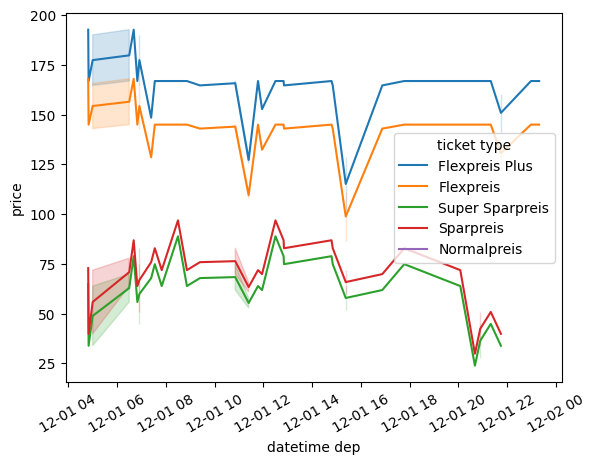

In [44]:
plot2 = sb.lineplot(data=df,x=df.index, y='price', hue='ticket type')
plot2.set_xticklabels(plot2.get_xticklabels(),rotation = 30)

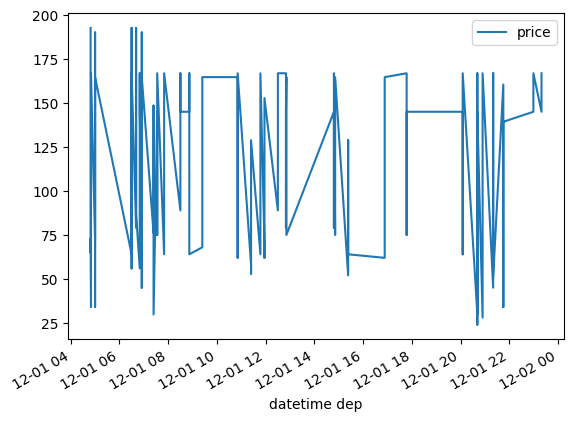

In [45]:
plot3 = df.plot(y='price')